In [184]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [185]:
raw_train_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')
raw_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [186]:
columns = ["OverallQual","Functional","GrLivArea","TotalBsmtSF","GarageCars","YearBuilt","Neighborhood","LotArea","KitchenQual","CentralAir","Fireplaces","YearRemodAdd","SalePrice","ExterQual","BsmtQual"] 
train_data = raw_train_data["Id"]
test_data = raw_test_data["Id"]
for column in raw_train_data.columns: 
    if column in columns:
        train_data = pd.concat([train_data,raw_train_data[column]],axis=1)

for column in raw_test_data.columns: 
    if column in columns:
        test_data = pd.concat([test_data,raw_test_data[column]],axis=1)
train_data

,Id,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,GrLivArea,KitchenQual,Functional,Fireplaces,GarageCars,SalePrice
0,1,8450,CollgCr,7,2003,2003,Gd,Gd,856,Y,1710,Gd,Typ,0,2,208500
1,2,9600,Veenker,6,1976,1976,TA,Gd,1262,Y,1262,TA,Typ,1,2,181500
2,3,11250,CollgCr,7,2001,2002,Gd,Gd,920,Y,1786,Gd,Typ,1,2,223500
3,4,9550,Crawfor,7,1915,1970,TA,TA,756,Y,1717,Gd,Typ,1,3,140000
4,5,14260,NoRidge,8,2000,2000,Gd,Gd,1145,Y,2198,Gd,Typ,1,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,Gilbert,6,1999,2000,TA,Gd,953,Y,1647,TA,Typ,1,2,175000
1456,1457,13175,NWAmes,6,1978,1988,TA,Gd,1542,Y,2073,TA,Min1,2,2,210000
1457,1458,9042,Crawfor,7,1941,2006,Ex,TA,1152,Y,2340,Gd,Typ,2,1,266500
1458,1459,9717,NAmes,5,1950,1996,TA,TA,1078,Y,1078,Gd,Typ,0,1,142125


We'll focus on the important stuff that really affects how much a house is worth, instead of looking at everything.
We will look at: 
OverallQual
Functional
GrLivArea
TotalBsmtSF
GarageCars
YearBuilt
Neighborhood
LotArea
KitchenQual
CentralAir
Fireplaces
YearRemodAdd


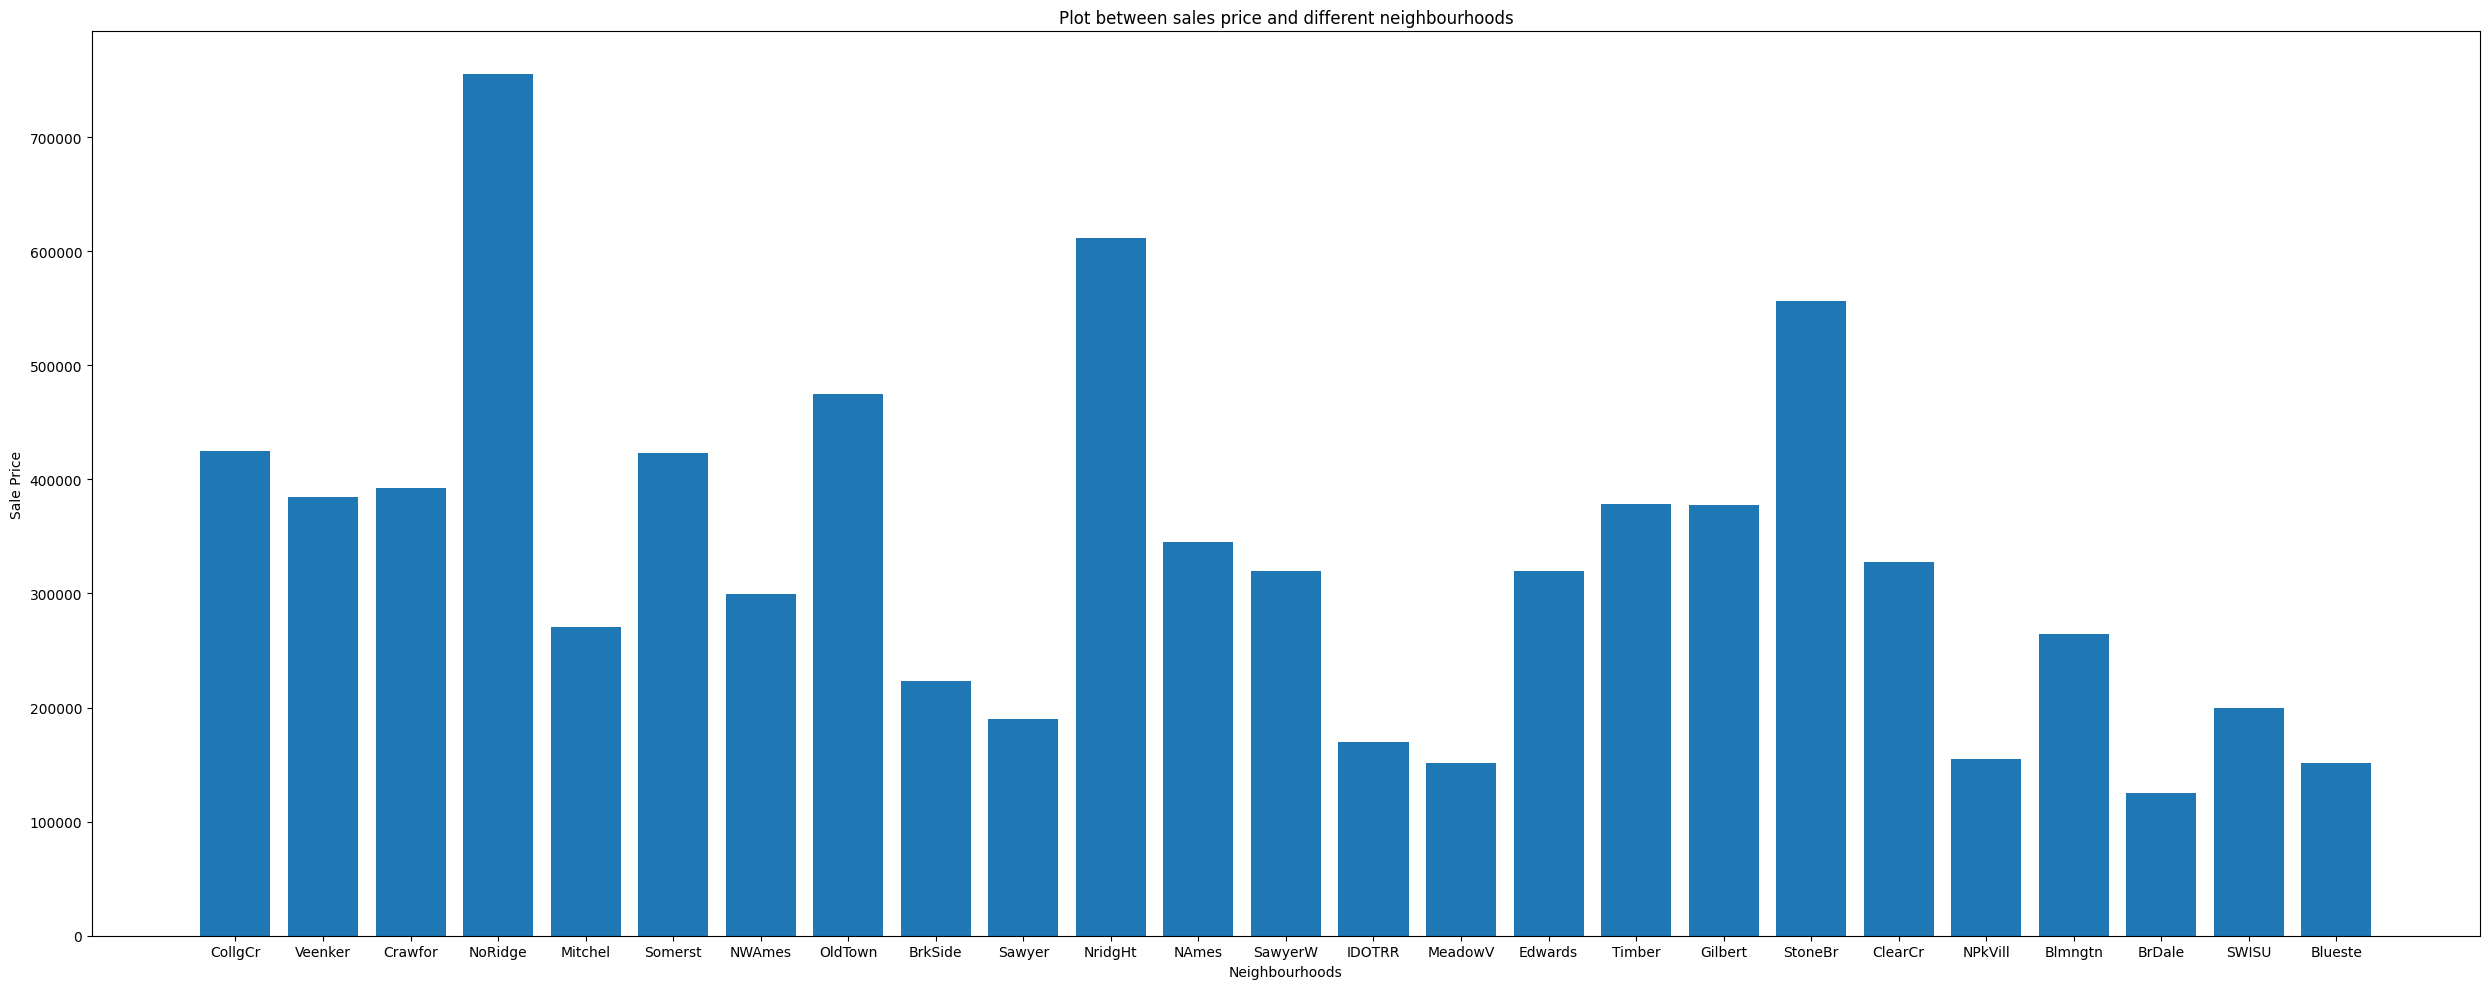

In [187]:
plt.figure(figsize=(25, 10)) 
plt.bar(train_data["Neighborhood"],train_data["SalePrice"])
plt.xlabel("Neighbourhoods")
plt.ylabel("Sale Price")
plt.title("Plot between sales price and different neighbourhoods")
plt.tight_layout()  
plt.show()

In [188]:
# convert all the text data to numeric data by encoding of data 

mapping = {}
# Label Encoding
label_encoder = LabelEncoder()
text_columns = ["Neighborhood","ExterQual","BsmtQual","CentralAir","KitchenQual","Functional"]
for column in text_columns:  
    train_data[column] = label_encoder.fit_transform(train_data[column])
    mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))




In [189]:
print("Label Encoded Mapping:")
for column, map_dict in mapping.items():
    print(f"\nColumn: {column}")
    for category, encoded_value in map_dict.items():
        print(f"{category} : {encoded_value}")


Label Encoded Mapping:

Column: Neighborhood
Blmngtn : 0
Blueste : 1
BrDale : 2
BrkSide : 3
ClearCr : 4
CollgCr : 5
Crawfor : 6
Edwards : 7
Gilbert : 8
IDOTRR : 9
MeadowV : 10
Mitchel : 11
NAmes : 12
NPkVill : 13
NWAmes : 14
NoRidge : 15
NridgHt : 16
OldTown : 17
SWISU : 18
Sawyer : 19
SawyerW : 20
Somerst : 21
StoneBr : 22
Timber : 23
Veenker : 24

Column: ExterQual
Ex : 0
Fa : 1
Gd : 2
TA : 3

Column: BsmtQual
Ex : 0
Fa : 1
Gd : 2
TA : 3
nan : 4

Column: CentralAir
N : 0
Y : 1

Column: KitchenQual
Ex : 0
Fa : 1
Gd : 2
TA : 3

Column: Functional
Maj1 : 0
Maj2 : 1
Min1 : 2
Min2 : 3
Mod : 4
Sev : 5
Typ : 6


In [190]:
# fill all the null values by their mean in BsmtQual column 
mean = train_data["BsmtQual"].mean()
train_data["BsmtQual"].fillna(mean , inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   Neighborhood  1460 non-null   int64
 3   OverallQual   1460 non-null   int64
 4   YearBuilt     1460 non-null   int64
 5   YearRemodAdd  1460 non-null   int64
 6   ExterQual     1460 non-null   int64
 7   BsmtQual      1460 non-null   int64
 8   TotalBsmtSF   1460 non-null   int64
 9   CentralAir    1460 non-null   int64
 10  GrLivArea     1460 non-null   int64
 11  KitchenQual   1460 non-null   int64
 12  Functional    1460 non-null   int64
 13  Fireplaces    1460 non-null   int64
 14  GarageCars    1460 non-null   int64
 15  SalePrice     1460 non-null   int64
dtypes: int64(16)
memory usage: 182.6 KB


/var/folders/hf/0hg5qwdd7hxcdm9pxxwxl9zr0000gn/T/ipykernel_29086/3881238632.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["BsmtQual"].fillna(mean , inplace=True)


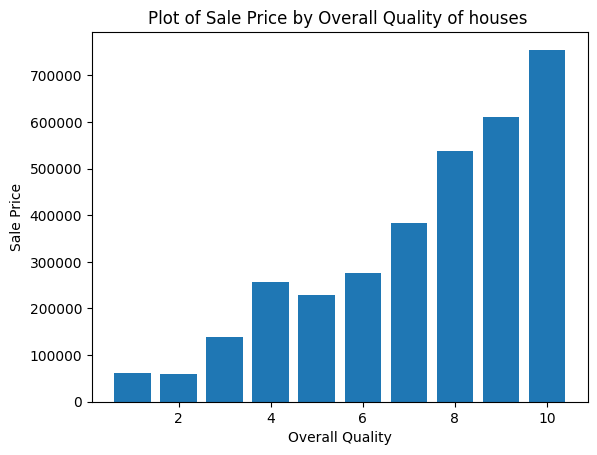

In [191]:
plt.bar(train_data["OverallQual"] , train_data["SalePrice"])
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.title("Plot of Sale Price by Overall Quality of houses ")
plt.show()

The bar graph highlights a straightforward pattern: as the overall quality of houses increases, so does their sales price. This observation underscores the significant impact of property quality on market value.

KitchenQual: Kitchen quality

       Ex	Excellent  0
       Gd	Good  2
       TA	Typical/Average  3
       Fa	Fair  1
       Po	Poo

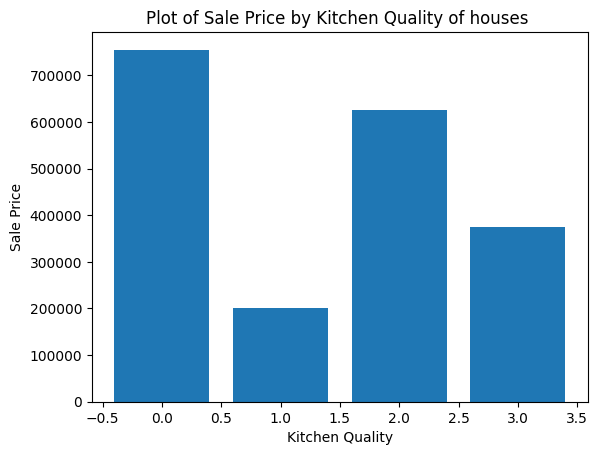

In [192]:
plt.bar(train_data["KitchenQual"] , train_data["SalePrice"])
plt.xlabel("Kitchen Quality")
plt.ylabel("Sale Price")
plt.title("Plot of Sale Price by Kitchen Quality of houses ")
plt.show()


The data underscores the significance of kitchen quality on sales prices, with homes graded as "excellent" or "good" fetching notably higher prices. This observation emphasizes the importance individuals place on kitchen quality when making purchasing decisions in the real estate market.

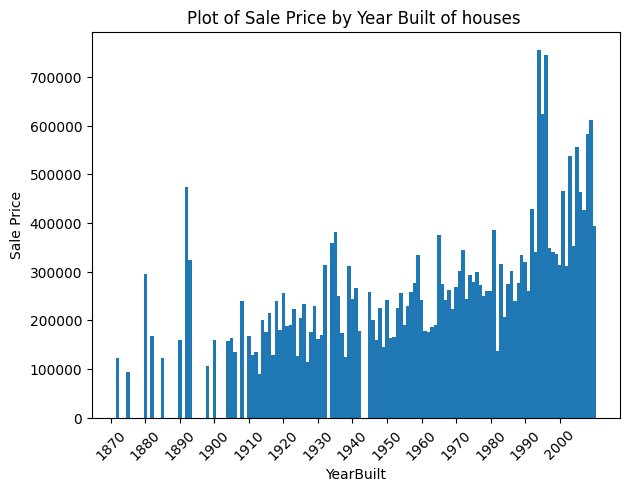

In [193]:
plt.bar(train_data["YearBuilt"] , train_data["SalePrice"], width=1)
plt.xlabel("YearBuilt")
plt.ylabel("Sale Price")
plt.xticks(range(1870, train_data["YearBuilt"].max(), 10), rotation=45) 
plt.tight_layout()
plt.title("Plot of Sale Price by Year Built of houses ")
plt.show()


To capture the variation in house prices over time, we observe a scattered pattern, indicating fluctuations in different periods. Interestingly, a substantial surge is noticeable around the 1990s, followed by a subsequent decline. This trend underscores the dynamic nature of housing markets, reflecting varying demand and economic conditions across different time periods.

Column: CentralAir
N : 0
Y : 1

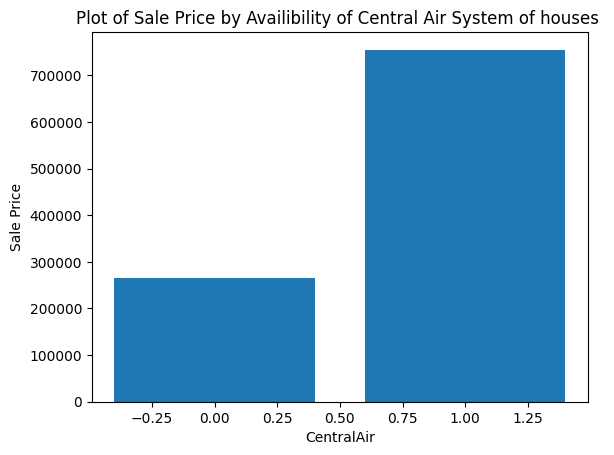

In [194]:
plt.bar(train_data["CentralAir"] , train_data["SalePrice"], width=0.8)
plt.xlabel("CentralAir")
plt.ylabel("Sale Price")
plt.title("Plot of Sale Price by Availibility of Central Air System of houses ")
plt.show()

The data shows that homes with central air systems tend to sell for higher prices, indicating the importance people place on this feature when buying a house.

   Ex	Excellent  
   Gd	Good  
   TA	Typical/Average  
   Fa	Fair  
Column: ExterQual
Ex : 0
Fa : 1
Gd : 2
TA : 3

Column: BsmtQual
Ex : 0
Fa : 1
Gd : 2
TA : 3
nan : 4

Text(0.5, 1.0, 'Plot of Sale Price by Basement Quality of houses ')

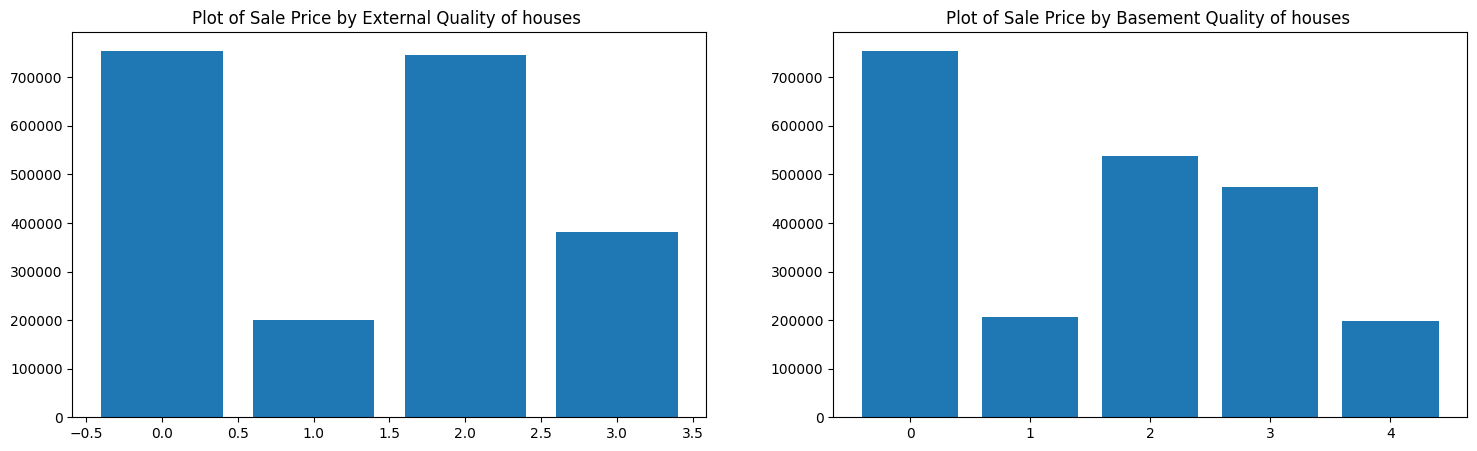

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].bar(train_data["ExterQual"] , train_data["SalePrice"], width=0.8)
axs[0].set_title("Plot of Sale Price by External Quality of houses ")

axs[1].bar(train_data["BsmtQual"] , train_data["SalePrice"], width=0.8)
axs[1].set_title("Plot of Sale Price by Basement Quality of houses ")



The data suggests a notable inclination towards homes with superior external quality, indicating its significant influence on purchasing decisions. Interestingly, while external quality appears to be a primary consideration for buyers, there is a comparatively lesser emphasis on basement quality. This observation underscores the nuanced preferences of buyers, highlighting external quality as a potential dealbreaker, while indicating a more lenient attitude towards basement quality in the housing market.

Let's build the Linear Regression Model

In [196]:
X = train_data.copy()
X.drop("SalePrice" , axis=1 , inplace=True)
y = train_data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [197]:
# model 
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [198]:
# make predictions and check accuracy 

y_pred = model.predict(X_test)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.824224500233264


### An R-squared value of 0.824 suggests that approximately 82.4% of the variability in the data can be explained by our model. This indicates a strong fit between the model and the observed data. In simple terms, our model is performing well in capturing and predicting the patterns present in the dataset.